Inicio importando las librerias neceasrias para el proyecto

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Cargar datos desde Excel
datos = pd.read_excel('Datos_Salud_1500.xlsx')

In [52]:
# Mostrar los primeros registros
print("Datos cargados:")
print(datos)

Datos cargados:
         Nombre  Horas_Ejercicio  Salud_Puntaje
0         María              7.0           55.0
1          José              9.0           83.0
2          Juan              2.0           17.0
3           Ana              4.0           34.0
4           NaN              6.0           51.0
...         ...              ...            ...
1495     Daniel              2.0           13.0
1496      Elena             10.0           76.0
1497      Pablo              NaN           11.0
1498       Raúl              6.0           59.0
1499  Guadalupe              9.0           71.0

[1500 rows x 3 columns]


In [53]:
#Exploracion de los datos
# Mostrar información general
print("\nInformación general:")
print(datos.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nombre           1343 non-null   object 
 1   Horas_Ejercicio  1361 non-null   float64
 2   Salud_Puntaje    1362 non-null   float64
dtypes: float64(2), object(1)
memory usage: 35.3+ KB
None


In [54]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(datos.describe())


Estadísticas descriptivas:
       Horas_Ejercicio  Salud_Puntaje
count      1361.000000    1362.000000
mean          6.642910      55.188693
std           3.430663      28.154456
min           1.000000      10.000000
25%           4.000000      31.000000
50%           7.000000      56.000000
75%          10.000000      80.000000
max          12.000000     100.000000


In [55]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(datos.isnull().sum())


Valores nulos por columna:
Nombre             157
Horas_Ejercicio    139
Salud_Puntaje      138
dtype: int64


In [56]:
# Verificar registros duplicados
print("\nNúmero de registros duplicados:")
print(datos.duplicated().sum())


Número de registros duplicados:
147


In [57]:
# Elimino Nulos
datos = datos.dropna()
print("\nValores nulos por columna después de eliminarlos:")
print(datos.isnull().sum())


Valores nulos por columna después de eliminarlos:
Nombre             0
Horas_Ejercicio    0
Salud_Puntaje      0
dtype: int64


In [58]:
# Eliminar registros duplicados
datos = datos.drop_duplicates()
print("\nNúmero de registros duplicados después de eliminarlos:")
print(datos.duplicated().sum())


Número de registros duplicados después de eliminarlos:
0


In [59]:
#Verifico mis datos actuales
print(datos)


         Nombre  Horas_Ejercicio  Salud_Puntaje
0         María              7.0           55.0
1          José              9.0           83.0
2          Juan              2.0           17.0
3           Ana              4.0           34.0
7        Miguel              4.0           29.0
...         ...              ...            ...
1494      Sofía              7.0           57.0
1495     Daniel              2.0           13.0
1496      Elena             10.0           76.0
1498       Raúl              6.0           59.0
1499  Guadalupe              9.0           71.0

[1024 rows x 3 columns]


Una vez finalizada la limpieza de mis datos procedo a la transformacion de los datos



In [60]:
#TRANFORMAR LOS DATOS
#agregar Nivel_Salud

Nivel_Salud=[]
for Salud_Puntaje in datos['Salud_Puntaje']:
    if Salud_Puntaje >= 75:
        Nivel_Salud.append('Alto')
    else:
        Nivel_Salud.append('Bajo')

In [61]:
#Una vez creada mi nueva columna "Nivel_Salud" la anexo a mi tabla de datos principal

datos['Nivel_Salud'] = Nivel_Salud

In [62]:
#Verfico mis datos actuales
print(datos)

         Nombre  Horas_Ejercicio  Salud_Puntaje Nivel_Salud
0         María              7.0           55.0        Bajo
1          José              9.0           83.0        Alto
2          Juan              2.0           17.0        Bajo
3           Ana              4.0           34.0        Bajo
7        Miguel              4.0           29.0        Bajo
...         ...              ...            ...         ...
1494      Sofía              7.0           57.0        Bajo
1495     Daniel              2.0           13.0        Bajo
1496      Elena             10.0           76.0        Alto
1498       Raúl              6.0           59.0        Bajo
1499  Guadalupe              9.0           71.0        Bajo

[1024 rows x 4 columns]



Graficando datos actuales:
         Nombre  Horas_Ejercicio  Salud_Puntaje Nivel_Salud
0         María              7.0           55.0        Bajo
1          José              9.0           83.0        Alto
2          Juan              2.0           17.0        Bajo
3           Ana              4.0           34.0        Bajo
7        Miguel              4.0           29.0        Bajo
...         ...              ...            ...         ...
1494      Sofía              7.0           57.0        Bajo
1495     Daniel              2.0           13.0        Bajo
1496      Elena             10.0           76.0        Alto
1498       Raúl              6.0           59.0        Bajo
1499  Guadalupe              9.0           71.0        Bajo

[1024 rows x 4 columns]


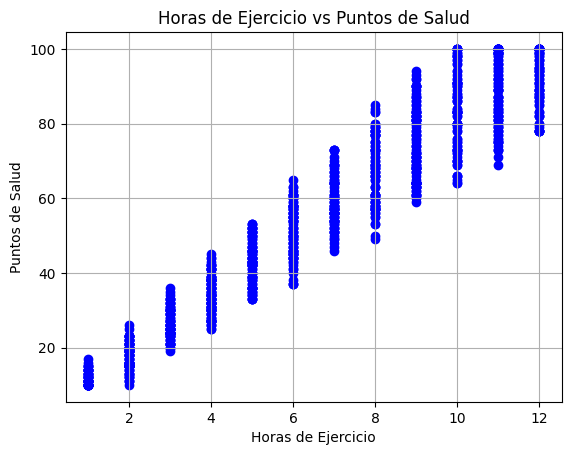

In [63]:
print("\nGraficando datos actuales:")
print(datos)
plt.scatter(datos['Horas_Ejercicio'], datos['Salud_Puntaje'], color='blue') # Crear gráfico de dispersión
plt.title('Horas de Ejercicio vs Puntos de Salud') # Título del gráfico
plt.xlabel('Horas de Ejercicio') # Etiqueta eje X
plt.ylabel('Puntos de Salud') # Etiqueta eje Y
plt.grid(True) # Mostrar cuadrícula
plt.show() # Mostrar gráfico

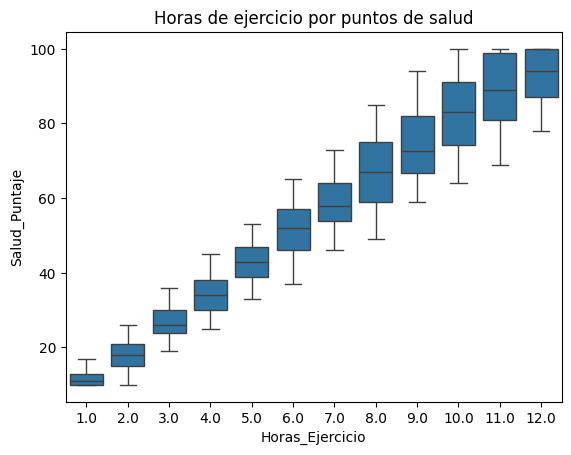

In [65]:
# Comparación de Puntos de salud por horas de ejercicio
sns.boxplot(x='Horas_Ejercicio', y='Salud_Puntaje', data=datos)
plt.title('Horas de ejercicio por puntos de salud')
plt.show()

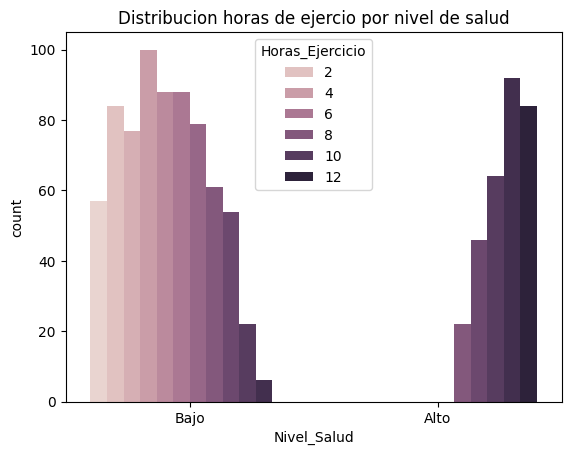

In [69]:
# Distribución horas de ejercicio y nivel de salud
sns.countplot(x='Nivel_Salud', hue='Horas_Ejercicio', data=datos)
plt.title('Distribucion horas de ejercio por nivel de salud')
plt.show()

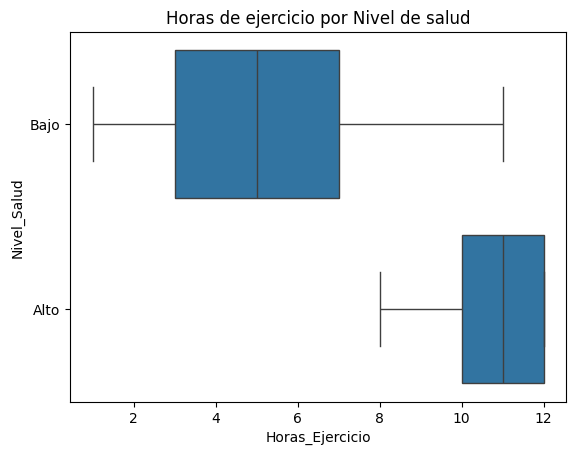

In [70]:
# Comparación de Puntos de salud por horas de ejercicio
sns.boxplot(x='Horas_Ejercicio', y='Nivel_Salud', data=datos)
plt.title('Horas de ejercicio por Nivel de salud')
plt.show()